In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('Churn_Modelling.csv')

### Preprocessing

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.size

140000

In [5]:
df.shape

(10000, 14)

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [12]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [14]:
df.groupby('Exited')['Tenure'].value_counts()

Exited  Tenure
0       7         851
        2         847
        8         828
        1         803
        5         803
        3         796
        4         786
        6         771
        9         771
        10        389
        0         318
1       1         232
        3         213
        9         213
        5         209
        4         203
        2         201
        8         197
        6         196
        7         177
        10        101
        0          95
Name: Tenure, dtype: int64

<AxesSubplot:xlabel='Tenure', ylabel='count'>

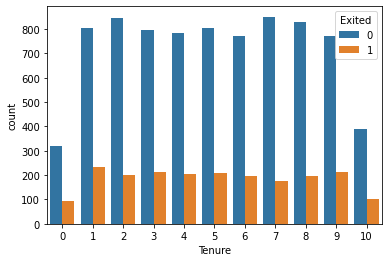

In [15]:
sns.countplot(x=df['Tenure'],hue=df['Exited'])

<AxesSubplot:xlabel='Age', ylabel='count'>

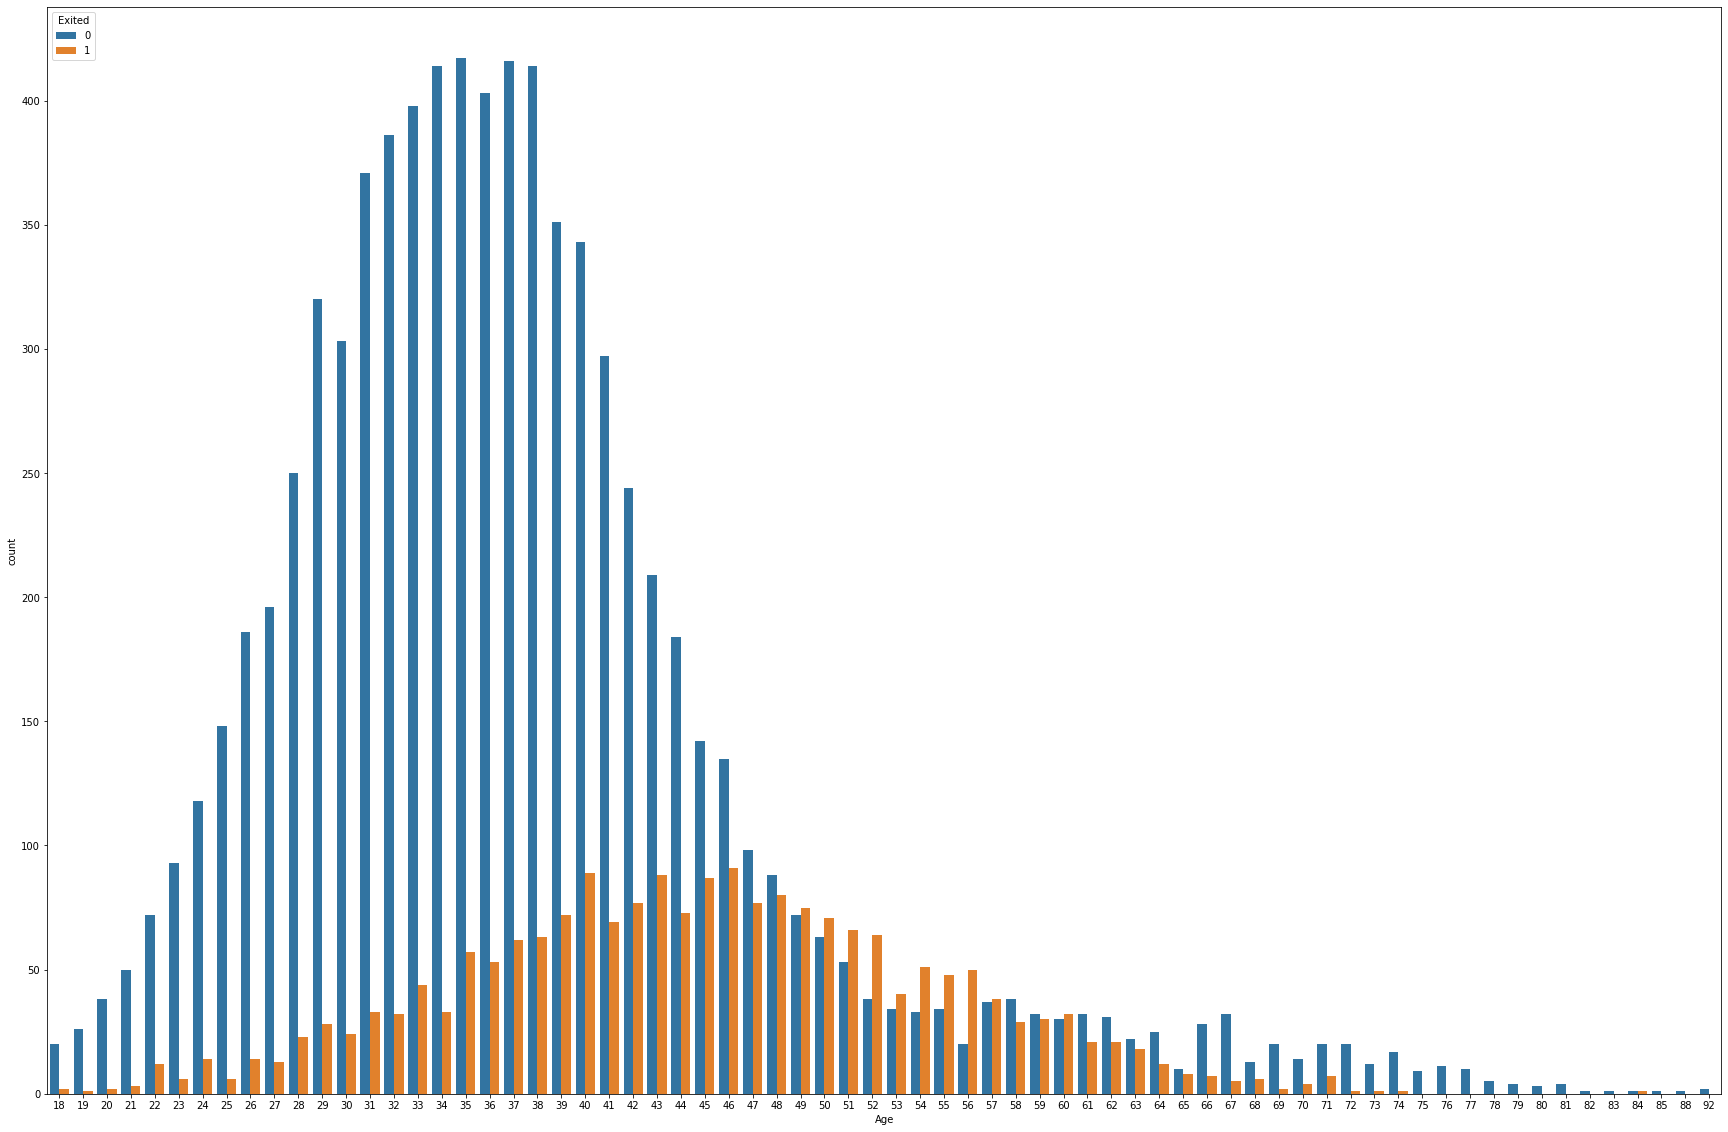

In [16]:

plt.figure(figsize=(30,20))
sns.countplot(x=df['Age'],hue=df['Exited'])

### Converting the Categorical Variables

In [17]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
States=pd.get_dummies(df['Geography'],drop_first=True)
Gender=pd.get_dummies(df['Gender'],drop_first=True)

In [19]:
df=pd.concat([df,States,Gender],axis=1)

In [20]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [21]:
df.drop(['Geography','Gender'],inplace=True,axis=1)

In [22]:
df.rename({'Male':'Gender'},inplace = True,axis=1)

In [23]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Germany', 'Spain',
       'Gender'],
      dtype='object')

### Splitting the training and testing Dataset

In [24]:
X=df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary','Germany', 'Spain',
       'Gender']]

In [25]:
X.shape

(10000, 11)

In [26]:
Y=df[['Exited']]

In [27]:
Y.shape

(10000, 1)

In [28]:
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test=train_test_split(X,Y,test_size=0.2)

### Normalizing the values with mean as 0 and Standard Deviation as 1

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
X_Train=sc.fit_transform(X_Train)

In [31]:
X_Test=sc.fit_transform(X_Test)

### Building the Classifier Model using Keras

In [32]:
import keras

In [33]:
from keras.models import Sequential
from keras.layers import Dense

In [34]:
Classifier=Sequential()

In [35]:
#To add the layers
#Dense helps to contruct the neurons
#Input Dimension means we have 11 features 
# Units is to create the hidden layers
#Uniform helps to distribute the weight uniformly
Classifier.add(Dense(activation = "relu",input_dim = 11,units = 6,kernel_initializer = "uniform")) 

In [36]:
Classifier.add(Dense(activation = "relu",units = 6,kernel_initializer = "uniform"))   #Adding second hidden layers

In [37]:
Classifier.add(Dense(activation = "sigmoid",units = 1,kernel_initializer = "uniform")) #Final neuron will be having siigmoid function

In [38]:
Classifier.compile(optimizer="adam",loss = 'binary_crossentropy',metrics = ['accuracy']) #To compile the Artificial Neural Network. Ussed Binary crossentropy as we just have only two output

In [39]:
Classifier.summary() #3 layers created. 6 neurons in 1st,6neurons in 2nd layer and 1 neuron in last

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [40]:
Classifier.fit(X_Train,Y_Train,batch_size=10,epochs=50) #Fitting the ANN to training dataset

Epoch 1/50
800/800 [==============================] - 6s 5ms/step - loss: 0.4893 - accuracy: 0.7926
Epoch 2/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4311 - accuracy: 0.7937
Epoch 3/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4262 - accuracy: 0.7937
Epoch 4/50
800/800 [==============================] - 2s 2ms/step - loss: 0.4216 - accuracy: 0.8141
Epoch 5/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4184 - accuracy: 0.8235
Epoch 6/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4163 - accuracy: 0.8255
Epoch 7/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4147 - accuracy: 0.8271
Epoch 8/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4134 - accuracy: 0.8288
Epoch 9/50
800/800 [==============================] - 3s 3ms/step - loss: 0.4122 - accuracy: 0.8296
Epoch 10/50
800/800 [==============================] - 2s 3ms/step - loss: 0.4111 - accuracy: 0.8295

In [42]:
y_pred =Classifier.predict(X_Test)
y_pred = (y_pred > 0.5) #Predicting the result

63/63 [==============================] - 0s 3ms/step


In [43]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [44]:
cm = confusion_matrix(Y_Test,y_pred)

In [45]:
cm

array([[1568,   45],
       [ 257,  130]], dtype=int64)

In [46]:
accuracy = accuracy_score(Y_Test,y_pred)

In [48]:
accuracy

0.849

Text(69.0, 0.5, 'Truth')

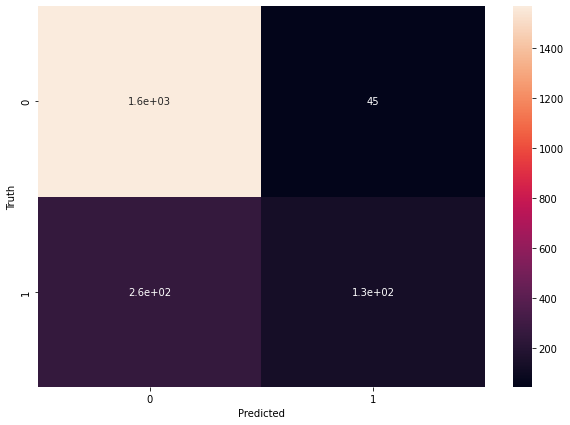

In [49]:
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
print(classification_report(Y_Test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1613
           1       0.74      0.34      0.46       387

    accuracy                           0.85      2000
   macro avg       0.80      0.65      0.69      2000
weighted avg       0.84      0.85      0.83      2000

